## Bibliotecas

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import tabular_ml_pipeline as ml_pipe
pd.set_option('display.max_columns', None)

## Carregando Treino

In [2]:
df = ml_pipe.load_data(data_dir='santander-customer-transaction-prediction', data_file='train.csv', id_col='ID_code')

Dados carregados com sucesso.


In [3]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [4]:
df.isna().sum().sum()

np.int64(0)

In [5]:
X_train, X_test, y_train, y_test = ml_pipe.split_data(df=df, train_size=0.8, target='target', stratify_col='target')

Dados separados em treino/teste


## Otimização de Modelo e Hiperparâmetro e Treinamento do Modelo

In [6]:
model_configs = [
    {
        'name': 'Stochastic Gradient Descent Classifier',
        'imputer': SimpleImputer(strategy='median'),
        'scaler': StandardScaler(),
        'model': SGDClassifier(random_state=42),
        'param_grid': {
            'model__penalty': ['l2', 'elasticnet'],
            'model__alpha': [0.0001, 0.001],
            'model__loss': ['log_loss']
        }
    },
    {
        'name': 'Random Forest Classifier',
        'imputer': SimpleImputer(strategy='median'),
        'scaler': StandardScaler(),
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'model__n_estimators': [50, 100],
            'model__max_depth': [10, 15],
            'model__n_jobs': [5]
        }
    },
    {
        'name': 'XGBoost Classifier',
        'imputer': SimpleImputer(strategy='median'),
        'scaler': StandardScaler(),
        'model': XGBClassifier(random_state=42),
        'param_grid': {
            'model__n_estimators': [50, 100],
            'model__max_depth': [10, 15],
            'model__n_jobs': [5]
        }
    }
]

In [7]:
n_splits = 5

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

searcher = GridSearchCV

In [8]:
best_estimator = ml_pipe.search_models(model_configs=model_configs,
                                       cv=skf,
                                       searcher=searcher,
                                       scoring='f1',
                                       X=X_train,
                                       y=y_train)

Realizando busca completa para modelos: ['Stochastic Gradient Descent Classifier', 'Random Forest Classifier', 'XGBoost Classifier']
Pipeline para Stochastic Gradient Descent Classifier montado
Busca montada
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Busca finalizada
Melhores hiperparâmetros: {'model__alpha': 0.0001, 'model__loss': 'log_loss', 'model__penalty': 'elasticnet'}
Melhor score: 0.39236879012677456
Pipeline para Random Forest Classifier montado
Busca montada
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Busca finalizada
Melhores hiperparâmetros: {'model__max_depth': 15, 'model__n_estimators': 50, 'model__n_jobs': 5}
Melhor score: 0.00012433944668946222
Pipeline para XGBoost Classifier montado
Busca montada
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Busca finalizada
Melhores hiperparâmetros: {'model__max_depth': 10, 'model__n_estimators': 100, 'model__n_jobs': 5}
Melhor score: 0.2214723557317301
Melhor modelo encontrado Stochasti

## Treino Final

In [9]:
best_estimator.fit(X_train, y_train)

,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


## Avaliação completa em treino

Test Metrics
Accuracy: 0.9121875
F1: 0.40319429105428595
Precision: 0.6358520900321544
Recall: 0.29518596840403033
ROC Curve


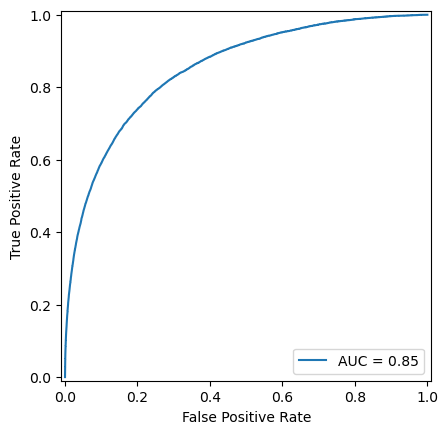

Confusion Matrix


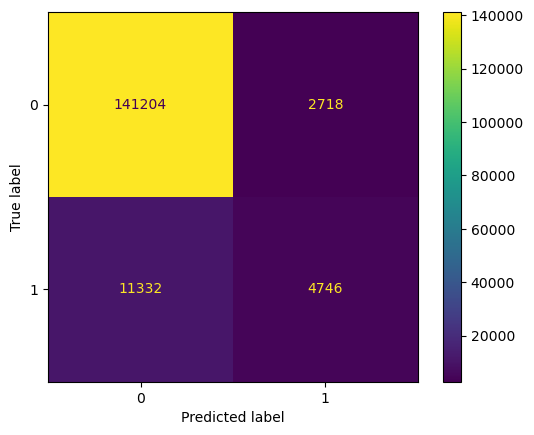

In [10]:
ml_pipe.final_evaluation(estimator=best_estimator, X=X_train, y=y_train)

## Avaliação completa em teste

Test Metrics
Accuracy: 0.910975
F1: 0.38635188695502326
Precision: 0.6287156477846326
Recall: 0.2788557213930348
ROC Curve


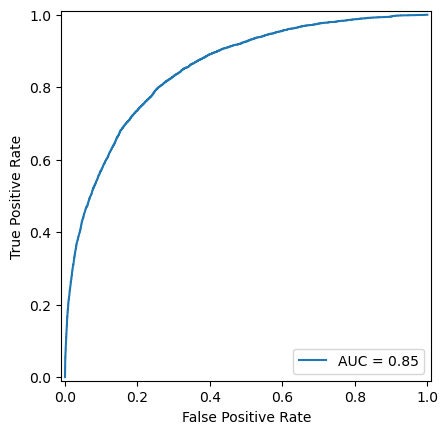

Confusion Matrix


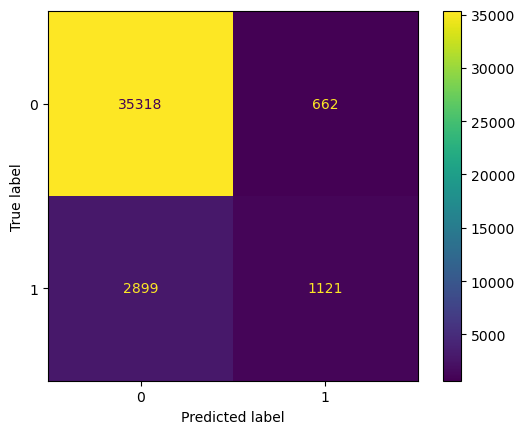

In [11]:
ml_pipe.final_evaluation(estimator=best_estimator, X=X_test, y=y_test)

## Salvando Modelo

In [12]:
import joblib
joblib.dump(best_estimator, 'deploy/model.joblib')

['deploy/model.joblib']